ASSIGNMENT 8: Dataset
• This assignment consists of two datasets:
– Spam classification dataset used in previous assignment
– News group dataset
• Spam classification dataset consists of two labels: spam and ham
• News group consists of 20 labels
2.2 Exercise
1. For spam classification you need to split the data randomly (80:20 ratio) and for newsgroup train and test
are already defined.
2. Perform clustering using KNN for spam classification [1 mark]
3. Perform clustering using KNN for newsgroup dataset [1 mark]
4. Perform clustering using Agglomerative clustering for spam classification. Display the number of clusters
per threshold. [3 marks]
5. Perform clustering using Agglomerative clustering for newsgroup dataset. Display the number of clusters
per threshold. [3 marks]
6. Evaluate the models using: Precision, Recall, F1-Score. [2 marks]

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

data = pd.read_csv('/content/SMSSpamCollection - SMSSpamCollection (1).csv')

new_column_names = ['label','text']
data.columns = new_column_names
X = data['text']
y = data['label']

# Split the data into training and testing sets (80:20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess and vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn.fit(X_train_tfidf, y_train)

# Predict on the testing set
y_pred = knn.predict(X_test_tfidf)

# Evaluate the KNN model
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

         ham       0.97      1.00      0.99       955
        spam       0.99      0.83      0.90       160

    accuracy                           0.97      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.97      0.97      1115



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


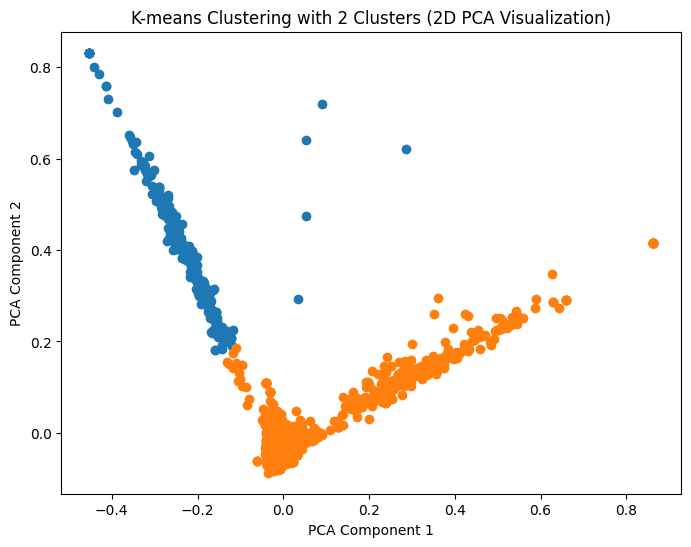

In [8]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(X)

# K-means clustering with 2 clusters
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_tfidf.toarray())

# Apply PCA to reduce the dimensionality to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf.toarray())

# Create a scatter plot for K-means clusters
plt.figure(figsize=(8, 6))
for i in range(num_clusters):
    cluster_points = X_pca[kmeans.labels_ == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i+1}')


plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering with 2 Clusters (2D PCA Visualization)')
plt.show()


Threshold: 1.0, Number of Clusters: 3264
Threshold: 2.0, Number of Clusters: 635
Threshold: 3.0, Number of Clusters: 177
Threshold: 4.0, Number of Clusters: 46
Threshold: 5.0, Number of Clusters: 11


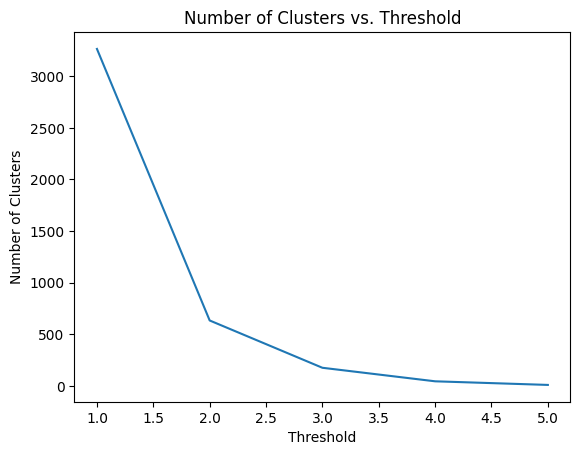

In [9]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Create a range of linkage thresholds to test
thresholds = [1.0, 2.0, 3.0, 4.0, 5.0]  # You can adjust these thresholds

# Initialize a dictionary to store the number of clusters for each threshold
num_clusters = {}

for threshold in thresholds:
    # Perform agglomerative clustering
    clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=threshold)
    clustering.fit(X_tfidf.toarray())  # Convert TF-IDF vectors to array

    # Count the number of clusters formed
    num_clusters[threshold] = max(clustering.labels_) + 1

# Display the number of clusters per threshold
for threshold, clusters in num_clusters.items():
    print(f"Threshold: {threshold}, Number of Clusters: {clusters}")

# Plot the number of clusters per threshold
plt.plot(list(num_clusters.keys()), list(num_clusters.values()))
plt.xlabel('Threshold')
plt.ylabel('Number of Clusters')
plt.title('Number of Clusters vs. Threshold')
plt.show()


Threshold: 1.0
Silhouette Score: 0.2671363412386675

Threshold: 2.0
Silhouette Score: 0.0831594629365728

Threshold: 3.0
Silhouette Score: 0.03719640028378159

Threshold: 4.0
Silhouette Score: 0.002462598535383304

Threshold: 5.0
Silhouette Score: 0.006331588152532545



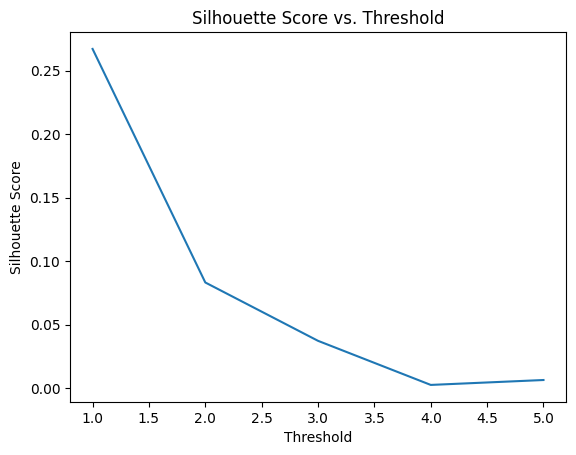

In [11]:
from sklearn.metrics import silhouette_score

# Initialize a dictionary to store silhouette scores for each threshold
silhouette_scores = {}

for threshold in thresholds:
    clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=threshold)
    cluster_labels = clustering.fit_predict(X_tfidf.toarray())

    # Calculate silhouette score
    silhouette = silhouette_score(X_tfidf, cluster_labels)
    silhouette_scores[threshold] = silhouette

    # Print the silhouette score for the current threshold
    print(f"Threshold: {threshold}")
    print(f"Silhouette Score: {silhouette}")
    print()

# Plot the silhouette scores
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), label='Silhouette Score')
plt.xlabel('Threshold')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Threshold')
plt.show()


In [ ]:
# Import necessary libraries
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import precision_score, recall_score, f1_score

# Load the 20 newsgroups dataset
newsgroups_data = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
X = newsgroups_data.data

# Convert text data to TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Number of clusters (for KNN and Agglomerative Clustering)
k_clusters = 20  # You can change this to the desired number of clusters

# Perform K-means clustering
kmeans = KMeans(n_clusters=k_clusters, random_state=42)
kmeans_clusters = kmeans.fit_predict(X_tfidf)

# Perform Agglomerative clustering for different threshold values
thresholds = [1.0, 2.0, 3.0]  # You can change these threshold values
agg_clusters = {}
for threshold in thresholds:
    agg_clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=threshold)
    agg_clusters[threshold] = agg_clustering.fit_predict(X_tfidf.toarray())  # Convert to dense array

# Evaluation metrics
ground_truth_labels = newsgroups_data.target

def evaluate_clusters(labels, predicted_clusters):
    precision = precision_score(labels, predicted_clusters, average='weighted')
    recall = recall_score(labels, predicted_clusters, average='weighted')
    f1 = f1_score(labels, predicted_clusters, average='weighted')
    return precision, recall, f1

# Evaluate K-means clustering
precision_kmeans, recall_kmeans, f1_kmeans = evaluate_clusters(ground_truth_labels, kmeans_clusters)

# Evaluate Agglomerative clustering for different thresholds
precision_agg = {}
recall_agg = {}
f1_agg = {}

for threshold in thresholds:
    precision_agg[threshold], recall_agg[threshold], f1_agg[threshold] = evaluate_clusters(ground_truth_labels, agg_clusters[threshold])

print(f"K-Means - Precision: {precision_kmeans:.4f}, Recall: {recall_kmeans:.4f}, F1-Score: {f1_kmeans:.4f}")

for threshold in thresholds:
    print(f"Agglomerative (Threshold={threshold}) - Precision: {precision_agg[threshold]:.4f}, Recall: {recall_agg[threshold]:.4f}, F1-Score: {f1_agg[threshold]:.4f}")


K-Means - Precision: 0.0225, Recall: 0.0297, F1-Score: 0.0216
Agglomerative (Threshold=1.0) - Precision: 0.0000, Recall: 0.0000, F1-Score: 0.0000
Agglomerative (Threshold=2.0) - Precision: 0.0188, Recall: 0.0005, F1-Score: 0.0010
Agglomerative (Threshold=3.0) - Precision: 0.0260, Recall: 0.0064, F1-Score: 0.0087


Threshold: 1.0, Number of Clusters: 14473
Threshold: 2.0, Number of Clusters: 990
Threshold: 3.0, Number of Clusters: 414
Threshold: 4.0, Number of Clusters: 167
Threshold: 5.0, Number of Clusters: 67


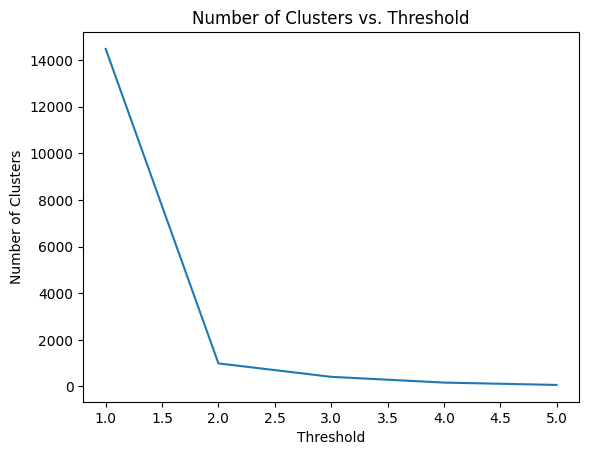

In [15]:
# Create a range of linkage thresholds to test
thresholds = [1.0, 2.0, 3.0, 4.0, 5.0]  # You can adjust these thresholds

# Initialize a dictionary to store the number of clusters for each threshold
num_clusters = {}

for threshold in thresholds:
    # Perform agglomerative clustering
    clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=threshold)
    clustering.fit(X_tfidf.toarray())  # Convert TF-IDF vectors to array

    # Count the number of clusters formed
    num_clusters[threshold] = max(clustering.labels_) + 1

# Display the number of clusters per threshold
for threshold, clusters in num_clusters.items():
    print(f"Threshold: {threshold}, Number of Clusters: {clusters}")

# Plot the number of clusters per threshold
plt.plot(list(num_clusters.keys()), list(num_clusters.values()))
plt.xlabel('Threshold')
plt.ylabel('Number of Clusters')
plt.title('Number of Clusters vs. Threshold')
plt.show()